In [56]:
# for SWH collection

# class and defs for processing the CryoSat tracks into DOT
import numpy as np
import pandas as pd
import datetime as dt
import copy
import itertools
import glob
import sys
import imp
import gc
sys.path.insert(0, '/Users/h/Github/geo_data_group/')
import data_year as dy
import grid_set as gs
from netCDF4 import Dataset
from invoke import run
from numba import jit
from scipy import stats
from dateutil.relativedelta import relativedelta
import cartopy.crs as ccrs
import cartopy.feature as cfeature
# from mpl_toolkits.basemap import Basemap
import matplotlib.pylab as pl
# from astropy.convolution import convolve
# from astropy.convolution import kernels

import matplotlib.pyplot as plt
imp.reload(gs)
imp.reload(dy)

<module 'data_year' from '/Users/h/Github/geo_data_group/data_year.py'>

In [57]:
# get a file - load the swh
file = '/Volumes/BU_extra/CryoSat/SWH/swh_arrays/SWH_100km_1d_all_orb_raw.npz'
swh_all = dy.load_data_year(file)
file = '/Volumes/BU_extra/CryoSat/SWH/swh_arrays/SWH_100km_1d_all_orb_SAR_bin.npz'
swh_SAR_bin = dy.load_data_year(file)
file = '/Volumes/BU_extra/CryoSat/SWH/swh_arrays/SWH_100km_1d_all_orb_SAR_binc.npz'
swh_SAR_binc = dy.load_data_year(file)
file = '/Volumes/BU_extra/CryoSat/SWH/swh_arrays/SWH_100km_1d_all_orb_LRM_bin.npz'
swh_LRM_bin = dy.load_data_year(file)
file = '/Volumes/BU_extra/CryoSat/SWH/swh_arrays/SWH_100km_1d_all_orb_LRM_binc.npz'
swh_LRM_binc = dy.load_data_year(file)
# file = 'First_saves_2014/SWH_100km_1d_201208'
# file = 'First_saves_2014/100km_1day_2014-04.npz'
# file = 'First_saves_2014/50km_5day_2014-04.npz'
# swh_all = dy.load_data_year(file+'_raw.npz')
# swh_fill = dy.load_data_year(file+'_filled.npz')

In [31]:
# get a file - load the swh
file = '/Volumes/BU_extra/CryoSat/SWH/swh_arrays/SWH_100km_1d_2014_prh_raw.npz'
swh_all_prh = dy.load_data_year(file)
file = '/Volumes/BU_extra/CryoSat/SWH/swh_arrays/SWH_100km_1d_2014_prh_SAR_bin.npz'
swh_SAR_bin_prh = dy.load_data_year(file)
file = '/Volumes/BU_extra/CryoSat/SWH/swh_arrays/SWH_100km_1d_2014_prh_SAR_binc.npz'
swh_SAR_binc_prh = dy.load_data_year(file)
file = '/Volumes/BU_extra/CryoSat/SWH/swh_arrays/SWH_100km_1d_2014_prh_LRM_bin.npz'
swh_LRM_bin_prh = dy.load_data_year(file)
file = '/Volumes/BU_extra/CryoSat/SWH/swh_arrays/SWH_100km_1d_2014_prh_LRM_binc.npz'
swh_LRM_binc_prh = dy.load_data_year(file)
# file = 'First_saves_2014/SWH_100km_1d_201208'
# file = 'First_saves_2014/100km_1day_2014-04.npz'
# file = 'First_saves_2014/50km_5day_2014-04.npz'
# swh_all = dy.load_data_year(file+'_raw.npz')
# swh_fill = dy.load_data_year(file+'_filled.npz')

In [58]:
# ice_binned = dy.load_data_year('/Users/H/WAVES/SWH_rads/Ice_binned_2014_(all).npz')
ice_binned = dy.load_data_year('/Volumes/BU_extra/NSIDC/daily/2011-2019_100km_grided.npz')

In [369]:
ice_extra = dy.load_data_year('/Volumes/BU_extra/NSIDC/daily/2019_100km_grided.npz')


In [99]:
new_dates = [ice_binned.dates[-1] + relativedelta(days=d)
            for d in range(1,2)]

In [109]:
swh_all.yrpd[:,-2],ice_binned.yrpd[:,-2]
swh_all.n_t,ice_binned.n_t

(3286, 3287)

In [94]:
t_p = ice_binned.get_index(dt.datetime(2019,12,29))
new_data = ice_binned.mask[t_p:]

In [370]:
date_c = ice_binned.dates

In [371]:
# dates = ice_binned.dates
[date_c.append(d) for d in ice_extra.dates]
0

0

In [372]:
data = ice_binned.data
data = np.append(data,ice_extra.data,axis=0)

In [373]:
mask = ice_binned.mask
mask = np.append(mask,ice_extra.mask,axis=0)

In [374]:
np.shape(data)[0],np.shape(date_c),np.shape(mask)


(3287, (3287,), (3287, 67, 67))

In [375]:
ice_new_binned = dy.data_year(data,date_c,periods=366)

In [376]:
ice_new_binned.mask = mask

In [377]:
ice_new_binned.save('/Volumes/BU_extra/NSIDC/daily/2011-2019_100km_grided.npz')

In [85]:
int(367/366)

1

In [60]:
# check for missing data
# get prh _range for default
ind_0 = swh_all.get_index(dt.datetime(2011,1,1))
ind_1 = swh_all.get_index(dt.datetime(2019,12,31))
swh_all.dates[ind_1],swh_all.dates[-2]

(datetime.datetime(2019, 12, 30, 0, 0), datetime.datetime(2019, 12, 29, 0, 0))

In [61]:
# check for missing data
# get prh _range for default
ind_IC0 = ice_binned.get_index(dt.datetime(2011,1,1))
ind_IC1 = ice_binned.get_index(dt.datetime(2019,12,31))
ice_binned.dates[ind_IC1],swh_all.dates[-1],ind_0,ind_IC0,ind_1,ind_IC1

(datetime.datetime(2019, 12, 31, 0, 0),
 datetime.datetime(2019, 12, 30, 0, 0),
 0,
 0,
 3285,
 3286)

In [18]:
ocean_only_m = swh_all.mask

In [38]:
np.shape(swh_all.data),swh_all.n_t

((3286, 67, 67), 3286)

In [53]:
# set grid - 50 km
# tp = np.shape(swh_all)[0]
tp = swh_all.n_t

# m = Basemap(projection='stere', lon_0=0.0, lat_0=90, lat_ts=70, 
#                 height = 3335000*2, width = 3335000*2)
m = ccrs.NorthPolarStereo()
G = gs.grid_set(m)
G.load_grid('/Users/H/WAVES/DOT_processing/grids/Polar_stereo_100km.npz')
G.load_mask('/Users/H/WAVES/DOT_processing/grids/Polar_stereo_100km_mask_no_inf.npz')
G.get_ptp()

Loaded a grid: /Users/H/WAVES/DOT_processing/grids/Polar_stereo_100km.npz
Loaded mask,  67  x  67  inflated by  0.0


In [23]:
G.inflate_mask(160e3)

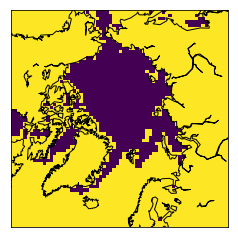

In [550]:
# need regional masking methods
# m.pcolormesh(G.xpts,G.ypts,G.mask.T)
# m.pcolormesh(G.xpts,G.ypts,ice_binned.mask[1943].T)
m.pcolormesh(G.xpts,G.ypts,ocean_only_m[5].T)
m.drawcoastlines()
plt.show()

In [59]:
# temp = swh.ravel(mask=True) 
ocean_only = np.ones_like(ice_binned.data[ind_IC0:ind_IC1+1])
ocean_only_m = np.ones_like(ice_binned.data[ind_IC0:ind_IC1+1],dtype=bool)
ocean_only[ice_binned.mask[ind_IC0:ind_IC1+1]] = np.nan
ocean_only_m[ice_binned.mask[ind_IC0:ind_IC1+1]] = False

swh_all.mask = copy.copy(ocean_only_m)
swh_all.build_static_mask(np.isfinite(G.mask))


In [83]:
swh_no_bias.save_nc('/Volumes/BU_extra/CryoSat/SWH/swh_arrays/SWH_arco_100k_no_bias_2011-2019.nc',
                dt.datetime(2000,1,1),
               SWH_attr, 
               data_name= 'CryoSat2_swh',
               save_mask=True,grid=G,mask=True,
               description= 'CryoSat2 derived SWH, from the Wingham 2018 retracker. Processed 24-06-2020',
            add_attr = [
                ['Mask','Using NSIDC nasa team ice concentration 15% contour'],
                ['Time_written',dt.date.today().strftime('%Y-%m-%d')],
                ['publisher_name', 'UCL_CPOM' ],
                ['publisher_type',  'institution' ],
                ['publisher_email',  'a.muir@ucl.ac.uk' ],
                ['publisher_url',  'http://www.cpom.ucl.ac.uk/ocean_wave_height/' ]
            ])

Adding grid points


In [76]:
SWH_attr = {'long_name':'Significant wave height',
            'units':'meters',}
mask_attr = {'long_name':'Smoothed Dynamic Ocean topography',
            'units':'meters'}

In [62]:
offset_mask = swh_LRM_binc.data>3
offset_mask[swh_SAR_binc.data<4] = False
# offset_mask_prh = swh_LRM_binc_prh.data>3
# offset_mask_prh[swh_SAR_binc_prh.data<4] = False

In [63]:
offset= swh_LRM_bin.data-swh_SAR_bin.data
# offset_prh = swh_LRM_bin_prh.data-swh_SAR_bin_prh.data

In [64]:
offset[offset_mask==False] = np.nan
# offset_prh[offset_mask_prh==False] = np.nan

In [65]:
offset_dy = dy.data_year(offset,swh_all.dates,periods = 365)
offset_dy.mask = offset_mask
# offset_dy_prh = dy.data_year(offset_prh,swh_all_prh.dates,periods = 365)
# offset_dy_prh.mask = offset_mask_prh

In [13]:
# np.nanpercentile(offset_dy_prh.data,[50],axis=(1,2))
# np.sum(np.isfinite(offset_dy.data[ind_0:ind_1,:,:]))
# np.sum(np.isfinite(offset_dy_prh.data))
# np.sum(np.isfinite(swh_all_prh.data))
# np.nanmean(np.sum(offset_mask_prh,axis=(1,2)))
# np.sum(offset_mask,axis=(1,2))

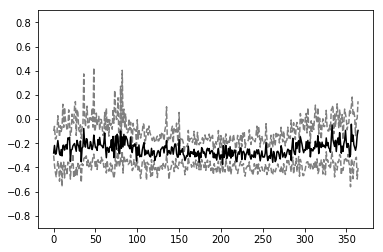

/Users/H/anaconda/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1354: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)


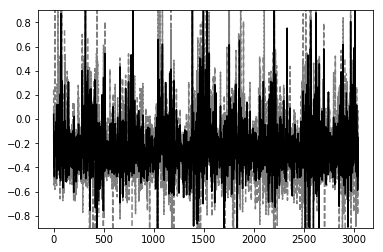

In [18]:
end_p = swh_all.get_index(dt.datetime(2019,10,30))
# plt.plot(np.nanmean(offset,axis=(1,2)))
ax = plt.plot(offset_dy.clim_centile([25,50,75],time_set=[0,end_p]))
# ax = plt.plot(offset_dy.clim_mean())
for i in [0,2]:
    ax[i].set_linestyle('dashed')
    ax[i].set_color('k')
    ax[i].set_alpha(0.5)
i = 1
ax[i].set_color('k')
plt.ylim([-0.9,0.9])
# ax[2].linestyle = 
plt.show()



# plt.plot(np.nanmean(offset,axis=(1,2)))
ax = plt.plot(np.nanpercentile(offset,[25,50,75],axis=(1,2)).T)
# ax = plt.plot(np.nanpercentile(offset_prh,[25,50,75],axis=(1,2)).T)
# ax = plt.plot(offset_dy.clim_mean())
for i in [0,2]:
    ax[i].set_linestyle('dashed')
    ax[i].set_color('k')
    ax[i].set_alpha(0.5)
i = 1
ax[i].set_color('k')
# ax[2].linestyle = 
plt.ylim([-0.9,0.9])
plt.show()


In [66]:
pf = np.polynomial.polynomial.polyfit
x=swh_LRM_bin.data[offset_mask].ravel()
y=swh_SAR_bin.data[offset_mask].ravel()
# y=offset[offset_mask].ravel()
# plt.scatter(x,y, s=0.2)
bp,mp = pf(x,y,1)
bt = str(round(bp,3))
mt = str(round(mp,3))
bp, mp

(0.43848330855065765, 0.8923773453150435)

In [67]:
pf = np.polynomial.polynomial.polyfit
x=swh_all.data[offset_mask].ravel()
y=offset[offset_mask].ravel()
# plt.scatter(x,y, s=0.2)
bp,mp = pf(x,y,1)
bt = str(round(bp,3))
mt = str(round(mp,3))
bp+ mp* 1.0

-0.30460292444302317

In [68]:
# SWH = bp + mp(LRM -SAR)*SWH

In [20]:
#(1-b/SWH)/m + SAR
'LRM SWH = SAR SWH + (1.0 - '+bt+'/SWH)/'+mt+')'

'LRM SWH = SAR SWH + (1.0 - -0.376/SWH)/0.072)'

In [69]:
'LRM - SAR offset ='+bt+' + '+mt+' x SWH'

'LRM - SAR offset =-0.376 + 0.072 x SWH'

In [21]:
'LRM - SAR offset ='+bt+' + '+mt+' x SWH'

'LRM - SAR offset =-0.376 + 0.072 x SWH'

In [70]:
# make a new LRM_bin scaling up the using the above
LRM_correct = copy.copy(swh_LRM_bin.data)
LRM_correct = (LRM_correct - bp)/(1.0+mp)

In [71]:
swh_no_bias = copy.copy(swh_all)

In [72]:
# replace swh_no_bias data where LRM_binc>SAR_binc
LRM_rep = np.zeros_like(swh_all.data,dtype=bool)

In [73]:
# LRM_rep[swh_LRM_binc.data>0] = True
LRM_rep[swh_LRM_binc.data<swh_SAR_binc.data] = False

In [74]:
swh_no_bias.data[LRM_rep] = LRM_correct[LRM_rep]

In [47]:
swh_no_bias.save_nc('/Volumes/BU_extra/CryoSat/SWH/swh_arrays/SWH_100k_no_bias_2011-2019.nc',mask=True,grid=G,
               description= 'CryoSat2 derived SWH, from the Wingham 2018 retracker. Processed 24-06-2018. LRM to SAR mode bias removed. LRM_swh_new = (LRM_swh_old + 0.376)/(1 + 0.072)',
               data_name= 'CryoSat_swh')

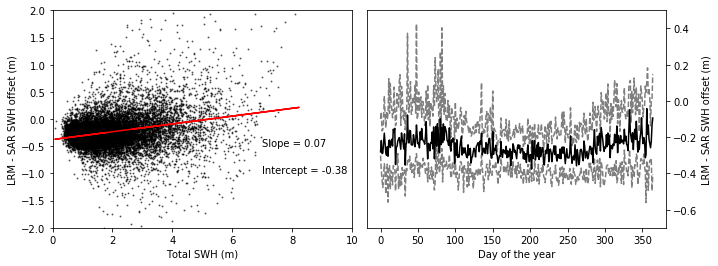

In [16]:
end_p = swh_all.n_t
f=plt.figure(figsize=[11,4])
plt.subplot(1,2,1)
plt.scatter(swh_all.data[offset_mask].ravel(),offset[offset_mask].ravel(),s=1,c='k',alpha = 0.5)
#            c = offset_m[offset_mask].ravel())
# plt.colorbar()
plt.plot(x,bp+mp*x,'-r')
plt.text(7,-0.5,'Slope = '+str(round(mp,2)))
plt.text(7,-1,'Intercept = '+str(round(bp,2)))

plt.xlabel('Total SWH (m)')
plt.ylabel('LRM - SAR SWH offset (m)')
plt.ylim([-2,2])
plt.xlim([0,10])
ax = plt.subplot(1,2,2)
pp = plt.plot(offset_dy.clim_centile([25,50,75],time_set=[0,end_p]))
for i in [0,2]:
    pp[i].set_linestyle('dashed')
    pp[i].set_color('k')
    pp[i].set_alpha(0.5)
i = 1
pp[i].set_color('k')
plt.ylim([-0.7,0.5])
plt.ylabel('LRM - SAR SWH offset (m)')
# plt.yticks([-1,-0.5,0.0,0.5,1.0])
ax.yaxis.set_label_position('right')
ax.yaxis.tick_right()
# plt.plot(np.nanmean(offset,axis=(1,2)))
# plt.yticks([])
plt.xlabel('Day of the year')
plt.subplots_adjust(wspace=0.05)
plt.show()
# f.savefig('2011-2019_offset_comp.pdf',bbox_inches='tight')

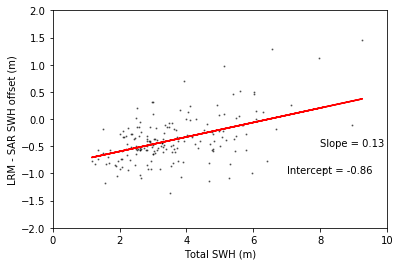

In [27]:
f=plt.figure(figsize=[6,4])
x=swh_all_prh.data[offset_mask_prh].ravel()
y=offset_prh[offset_mask_prh].ravel()
# plt.scatter(x,y, s=0.2)
bp,mp = pf(x,y,1)
plt.scatter(swh_all_prh.data[offset_mask_prh].ravel(),offset_prh[offset_mask_prh].ravel(),s=1,c='k',alpha = 0.5)
#            c = offset_m[offset_mask].ravel())
# plt.colorbar()
plt.plot(x,bp+mp*x,'-r')
plt.text(8,-0.5,'Slope = '+str(round(mp,2)))
plt.text(7,-1,'Intercept = '+str(round(bp,2)))

plt.xlabel('Total SWH (m)')
plt.ylabel('LRM - SAR SWH offset (m)')
plt.ylim([-2,2])
plt.xlim([0,10])
plt.show()
# f.savefig('2014_prh_offset_comp.pdf',bbox_inches='tight')

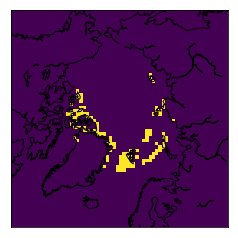

In [53]:
# mask for yevgeny
lon_r = [-180,180]
lat_r = [60,66] 
lowm = G.generate_mask_lonlat(lon_r,lat_r)
lon_r = [-180,180]
lat_r = [66,91]
highm = G.generate_mask_lonlat(lon_r,lat_r)
# m.pcolormesh(G.xpts,G.ypts,lowm.T)
# m.pcolormesh(G.xpts,G.ypts,G.mask.T)
m.pcolormesh(G.xpts,G.ypts,swh_all.mask[0].T)
m.drawcoastlines()
plt.show()


In [42]:
JJA = swh_all.get_periods(dt.datetime(2014,6,1),dt.datetime(2014,8,31))
DJF = swh_all.get_periods(dt.datetime(2014,1,1),dt.datetime(2014,3,1))
DJF = np.concatenate([DJF,swh_all.get_periods(dt.datetime(2014,12,1),dt.datetime(2014,12,31))])

In [59]:
swh_all.mask = copy.copy(ocean_only_m)
swh_all.build_static_mask(lowm)
arr = swh_all.clim_map(JJA,mask=True)
np.nanmean(arr), np.nanstd(arr)

/Users/H/WAVES/geo_data_group/data_year.py:385: RuntimeWarning: Mean of empty slice
  axis = 0)


(1.2948619600922846, 0.45821590243265575)

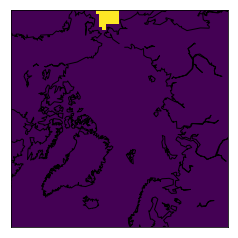

In [382]:
# to make a mask by lon lat ranges
# Nordic-Greenland
# Barents
# Kara
# Laptev
# E Siberian
# Beaufort Chuckchi
    # 176.4 to 156.2 to
    # 66.3 71
    
# Baffin Bay
lon_r = [-90,-50]
lat_r = [60,75]
baffin_m = G.generate_mask_lonlat(lon_r,lat_r)
m.pcolormesh(G.xpts,G.ypts,baffin_m.T)
lon_r = [-75,-50]
lat_r = [60,79]
labrador_m = G.generate_mask_lonlat(lon_r,lat_r)
# m.pcolormesh(G.xpts,G.ypts,labrador_m.T)
lon_r = [-180,-128]
lat_r = [65,80]
beaufort_m = G.generate_mask_lonlat(lon_r,lat_r)
m.pcolormesh(G.xpts,G.ypts,beaufort_m.T)
lon_r = [-180,-148]
lat_r = [60,65]
bering_m = G.generate_mask_lonlat(lon_r,lat_r)
m.pcolormesh(G.xpts,G.ypts,bering_m.T)
lon_r = [140,180]
lat_r = [70,80]
eastsib_m = G.generate_mask_lonlat(lon_r,lat_r)
# m.pcolormesh(G.xpts,G.ypts,eastsib_m.T)
lon_r = [100,140]
lat_r = [70,80]
laptev_m = G.generate_mask_lonlat(lon_r,lat_r)
# m.pcolormesh(G.xpts,G.ypts,laptev_m.T)
lon_r = [55,100]
lat_r = [70,80]
kara_m = G.generate_mask_lonlat(lon_r,lat_r)
# m.pcolormesh(G.xpts,G.ypts,kara_m.T)
lon_r = [15,55]
lat_r = [68,80]
barents_m = G.generate_mask_lonlat(lon_r,lat_r)
# m.pcolormesh(G.xpts,G.ypts,barents_m.T)
lon_r = [-45,15]
lat_r = [60,80]
atlantic_m = G.generate_mask_lonlat(lon_r,lat_r)
# m.pcolormesh(G.xpts,G.ypts,atlantic_m.T)
lon_r = [-180,180]
lat_r = [80,91]
central_m = G.generate_mask_lonlat(lon_r,lat_r)
# m.pcolormesh(G.xpts,G.ypts,central_m.T)
m.drawcoastlines()
plt.show()

/Users/H/WAVES/geo_data_group/data_year.py:274: RuntimeWarning: Mean of empty slice
  temp_array[pind] = np.nanmean(temp)
/Users/H/WAVES/geo_data_group/data_year.py:381: RuntimeWarning: Mean of empty slice
  def ravel(self,mask = False,remove_nan=False,periods=[],year_set = [],time_set = []):
/Users/H/WAVES/geo_data_group/data_year.py:384: RuntimeWarning: Mean of empty slice
  """


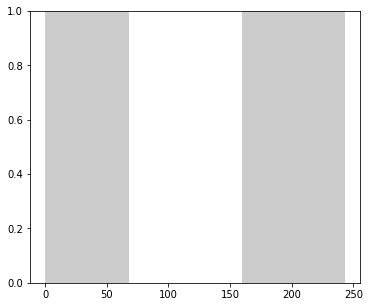

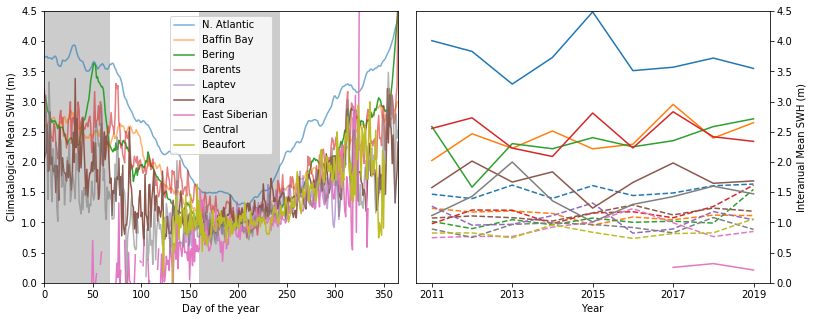

In [385]:
f = plt.figure(figsize=[13,5])
periods_S = swh_all.get_periods(dt.datetime(2014,6,10),dt.datetime(2014,9,1))
periods_W = swh_all.get_periods(dt.datetime(2014,1,1),dt.datetime(2014,3,10))
au=0.6
au2=0.99
# swh_all.build_mask()
plt.subplot(1,2,1)
plt.axvspan(periods_W[0],periods_W[-1], facecolor='k', alpha=0.2)
plt.axvspan(periods_S[0],periods_S[-1], facecolor='k', alpha=0.2)
# plt.axvline(periods_W[-1],color = 'k',linestyle = '--')
# plt.axvline(periods_S[0],color = 'k',linestyle = '--')
# plt.axvline(periods_S[-1],color = 'k',linestyle = '--')
swh_all.mask = copy.copy(ocean_only_m)
swh_all.build_static_mask(atlantic_m)
plt.plot(swh_all.clim_mean(mask=True,moving_av=10),alpha=au)
swh_all.mask = copy.copy(ocean_only_m)
swh_all.build_static_mask(labrador_m)
plt.plot(swh_all.clim_mean(mask=True,moving_av=10),alpha=au)
swh_all.mask = copy.copy(ocean_only_m)
swh_all.build_static_mask(bering_m)
plt.plot(swh_all.clim_mean(mask=True,moving_av=10),alpha=au2)
swh_all.mask = copy.copy(ocean_only_m)
swh_all.build_static_mask(barents_m)
plt.plot(swh_all.clim_mean(mask=True,moving_av=10),alpha=au)
swh_all.mask = copy.copy(ocean_only_m)
swh_all.build_static_mask(laptev_m)
plt.plot(swh_all.clim_mean(mask=True,moving_av=10),alpha=au)
swh_all.mask = copy.copy(ocean_only_m)
swh_all.build_static_mask(kara_m)
plt.plot(swh_all.clim_mean(mask=True,moving_av=10),alpha=au2)
swh_all.mask = copy.copy(ocean_only_m)
swh_all.build_static_mask(eastsib_m)
plt.plot(swh_all.clim_mean(mask=True,moving_av=10),alpha=au2)
swh_all.mask = copy.copy(ocean_only_m)
swh_all.build_static_mask(central_m)
plt.plot(swh_all.clim_mean(mask=True,moving_av=10),alpha=au)
swh_all.mask = copy.copy(ocean_only_m)
swh_all.build_static_mask(beaufort_m)
plt.plot(swh_all.clim_mean(mask=True,moving_av=10),alpha=au2)
plt.ylim([0,4.5])
plt.xlim([0,365])
plt.ylabel('Climatalogical Mean SWH (m)')
plt.xlabel('Day of the year')
plt.legend(['N. Atlantic','Baffin Bay','Bering','Barents','Laptev','Kara','East Siberian','Central','Beaufort'])

ax=plt.subplot(1,2,2)
# swh_all.build_mask()
swh_all.mask = copy.copy(ocean_only_m)
swh_all.build_static_mask(atlantic_m)
p = plt.plot(swh_all.year_mean(periods=periods_W,mask=True))
plt.plot(swh_all.year_mean(periods=periods_S,mask=True),
         color = p[0].get_color(),linestyle = '--')
swh_all.mask = copy.copy(ocean_only_m)
swh_all.build_static_mask(labrador_m)
p = plt.plot(swh_all.year_mean(periods=periods_W,mask=True))
plt.plot(swh_all.year_mean(periods=periods_S,mask=True),
         color = p[0].get_color(),linestyle = '--')
swh_all.mask = copy.copy(ocean_only_m)
swh_all.build_static_mask(bering_m)
p = plt.plot(swh_all.year_mean(periods=periods_W,mask=True))
plt.plot(swh_all.year_mean(periods=periods_S,mask=True),
         color = p[0].get_color(),linestyle = '--')
# plt.plot(swh_all.clim_mean(mask=True))
swh_all.mask = copy.copy(ocean_only_m)
swh_all.build_static_mask(barents_m)
p = plt.plot(swh_all.year_mean(periods=periods_W,mask=True))
plt.plot(swh_all.year_mean(periods=periods_S,mask=True),
         color = p[0].get_color(),linestyle = '--')
# plt.plot(swh_all.clim_mean(mask=True))
swh_all.mask = copy.copy(ocean_only_m)
swh_all.build_static_mask(laptev_m)
p = plt.plot(swh_all.year_mean(periods=periods_W,mask=True))
plt.plot(swh_all.year_mean(periods=periods_S,mask=True),
         color = p[0].get_color(),linestyle = '--')
# plt.plot(swh_all.clim_mean(mask=True))
swh_all.mask = copy.copy(ocean_only_m)
swh_all.build_static_mask(kara_m)
p = plt.plot(swh_all.year_mean(periods=periods_W,mask=True))
plt.plot(swh_all.year_mean(periods=periods_S,mask=True),
         color = p[0].get_color(),linestyle = '--')
swh_all.mask = copy.copy(ocean_only_m)
swh_all.build_static_mask(eastsib_m)
p = plt.plot(swh_all.year_mean(periods=periods_W,mask=True))
plt.plot(swh_all.year_mean(periods=periods_S,mask=True),
         color = p[0].get_color(),linestyle = '--')
swh_all.mask = copy.copy(ocean_only_m)
swh_all.build_static_mask(central_m)
p = plt.plot(swh_all.year_mean(periods=periods_W,mask=True))
plt.plot(swh_all.year_mean(periods=periods_S,mask=True),
         color = p[0].get_color(),linestyle = '--')
swh_all.mask = copy.copy(ocean_only_m)
swh_all.build_static_mask(beaufort_m)
p = plt.plot(swh_all.year_mean(periods=periods_W,mask=True))
plt.plot(swh_all.year_mean(periods=periods_S,mask=True),
         color = p[0].get_color(),linestyle = '--')
# plt.plot(swh_all.clim_mean(mask=True))
# plt.legend(['Atlantic','Beaufort','Labrador','Barents','West Siberian','East Siberian'])
# plt.legend(['Atlantic','Labrador','Barents','Laptev','Kara','East Siberian','Central','Beaufort'])
plt.xticks([0,2,4,6,8],['2011','2013','2015','2017','2019'])
plt.ylim([0,8])
plt.ylim([0,4.5])
plt.ylabel('Interanual Mean SWH (m)')
plt.xlabel('Year')
ax.yaxis.set_label_position('right')
ax.yaxis.tick_right()
plt.subplots_adjust(wspace=0.05)
plt.show()
f.savefig('SWH_all_clim_lines.pdf',bbox_inches = 'tight')

/Users/H/WAVES/geo_data_group/data_year.py:381: RuntimeWarning: Mean of empty slice
  def ravel(self,mask = False,remove_nan=False,periods=[],year_set = [],time_set = []):


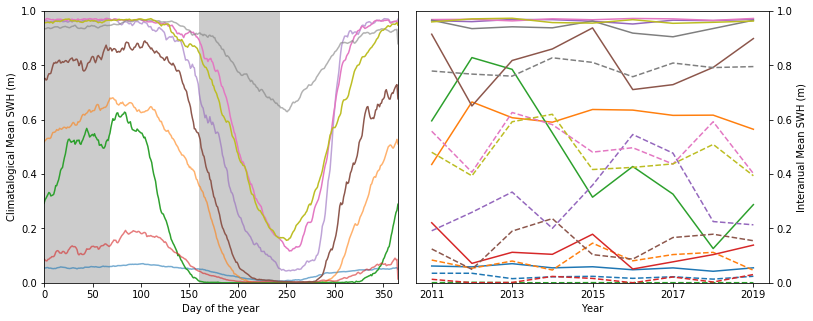

In [386]:
f = plt.figure(figsize=[13,5])
periods_S = ice_binned.get_periods(dt.datetime(2014,6,10),dt.datetime(2014,9,1))
periods_W = ice_binned.get_periods(dt.datetime(2014,1,1),dt.datetime(2014,3,10))
au=0.6
au2=0.99
# ice_binned.build_mask()
plt.subplot(1,2,1)
plt.axvspan(periods_W[0],periods_W[-1], facecolor='k', alpha=0.2)
plt.axvspan(periods_S[0],periods_S[-1], facecolor='k', alpha=0.2)
# plt.axvline(periods_W[-1],color = 'k',linestyle = '--')
# plt.axvline(periods_S[0],color = 'k',linestyle = '--')
# plt.axvline(periods_S[-1],color = 'k',linestyle = '--')
ice_binned.mask = False
ice_binned.build_static_mask(atlantic_m)
plt.plot(ice_binned.clim_mean(mask=True),alpha=au)
ice_binned.mask = False
ice_binned.build_static_mask(labrador_m)
plt.plot(ice_binned.clim_mean(mask=True),alpha=au)
ice_binned.mask = False
ice_binned.build_static_mask(bering_m)
plt.plot(ice_binned.clim_mean(mask=True),alpha=au2)
ice_binned.mask = False
ice_binned.build_static_mask(barents_m)
plt.plot(ice_binned.clim_mean(mask=True),alpha=au)
ice_binned.mask = False
ice_binned.build_static_mask(laptev_m)
plt.plot(ice_binned.clim_mean(mask=True),alpha=au)
ice_binned.mask = False
ice_binned.build_static_mask(kara_m)
plt.plot(ice_binned.clim_mean(mask=True),alpha=au2)
ice_binned.mask = False
ice_binned.build_static_mask(eastsib_m)
plt.plot(ice_binned.clim_mean(mask=True),alpha=au2)
ice_binned.mask = False
ice_binned.build_static_mask(central_m)
plt.plot(ice_binned.clim_mean(mask=True),alpha=au)
ice_binned.mask = False
ice_binned.build_static_mask(beaufort_m)
plt.plot(ice_binned.clim_mean(mask=True),alpha=au2)
plt.ylim([0,1])
plt.xlim([0,365])
plt.ylabel('Climatalogical Mean SWH (m)')
plt.xlabel('Day of the year')
# plt.legend(['N. Atlantic','Baffin Bay','Bering','Barents','Laptev','Kara','East Siberian','Central','Beaufort'])

ax=plt.subplot(1,2,2)
# ice_binned.build_mask()
ice_binned.mask = False
ice_binned.build_static_mask(atlantic_m)
p = plt.plot(ice_binned.year_mean(periods=periods_W,mask=True))
plt.plot(ice_binned.year_mean(periods=periods_S,mask=True),
         color = p[0].get_color(),linestyle = '--')
ice_binned.mask = False
ice_binned.build_static_mask(labrador_m)
p = plt.plot(ice_binned.year_mean(periods=periods_W,mask=True))
plt.plot(ice_binned.year_mean(periods=periods_S,mask=True),
         color = p[0].get_color(),linestyle = '--')
ice_binned.mask = False
ice_binned.build_static_mask(bering_m)
p = plt.plot(ice_binned.year_mean(periods=periods_W,mask=True))
plt.plot(ice_binned.year_mean(periods=periods_S,mask=True),
         color = p[0].get_color(),linestyle = '--')
# plt.plot(ice_binned.clim_mean(mask=True))
ice_binned.mask = False
ice_binned.build_static_mask(barents_m)
p = plt.plot(ice_binned.year_mean(periods=periods_W,mask=True))
plt.plot(ice_binned.year_mean(periods=periods_S,mask=True),
         color = p[0].get_color(),linestyle = '--')
# plt.plot(ice_binned.clim_mean(mask=True))
ice_binned.mask = False
ice_binned.build_static_mask(laptev_m)
p = plt.plot(ice_binned.year_mean(periods=periods_W,mask=True))
plt.plot(ice_binned.year_mean(periods=periods_S,mask=True),
         color = p[0].get_color(),linestyle = '--')
# plt.plot(ice_binned.clim_mean(mask=True))
ice_binned.mask = False
ice_binned.build_static_mask(kara_m)
p = plt.plot(ice_binned.year_mean(periods=periods_W,mask=True))
plt.plot(ice_binned.year_mean(periods=periods_S,mask=True),
         color = p[0].get_color(),linestyle = '--')
ice_binned.mask = False
ice_binned.build_static_mask(eastsib_m)
p = plt.plot(ice_binned.year_mean(periods=periods_W,mask=True))
plt.plot(ice_binned.year_mean(periods=periods_S,mask=True),
         color = p[0].get_color(),linestyle = '--')
ice_binned.mask = False
ice_binned.build_static_mask(central_m)
p = plt.plot(ice_binned.year_mean(periods=periods_W,mask=True))
plt.plot(ice_binned.year_mean(periods=periods_S,mask=True),
         color = p[0].get_color(),linestyle = '--')
ice_binned.mask = False
ice_binned.build_static_mask(beaufort_m)
p = plt.plot(ice_binned.year_mean(periods=periods_W,mask=True))
plt.plot(ice_binned.year_mean(periods=periods_S,mask=True),
         color = p[0].get_color(),linestyle = '--')
# plt.plot(ice_binned.clim_mean(mask=True))
# plt.legend(['Atlantic','Beaufort','Labrador','Barents','West Siberian','East Siberian'])
# plt.legend(['Atlantic','Labrador','Barents','Laptev','Kara','East Siberian','Central','Beaufort'])
plt.xticks([0,2,4,6,8],['2011','2013','2015','2017','2019'])
plt.ylim([0,1])
plt.ylabel('Interanual Mean SWH (m)')
plt.xlabel('Year')
ax.yaxis.set_label_position('right')
ax.yaxis.tick_right()
plt.subplots_adjust(wspace=0.05)
plt.show()
# f.savefig('ice_binned_clim_lines.pdf',bbox_inches = 'tight')

/Users/H/WAVES/geo_data_group/data_year.py:274: RuntimeWarning: Mean of empty slice
  temp_array[pind] = np.nanmean(temp)
/Users/H/WAVES/geo_data_group/data_year.py:381: RuntimeWarning: Mean of empty slice
  def ravel(self,mask = False,remove_nan=False,periods=[],year_set = [],time_set = []):
/Users/H/WAVES/geo_data_group/data_year.py:384: RuntimeWarning: Mean of empty slice
  """


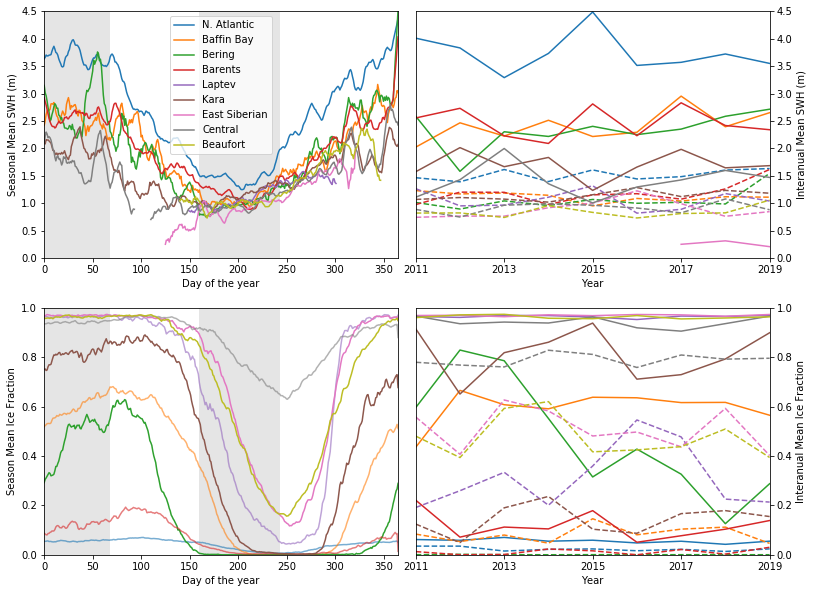

In [429]:
f = plt.figure(figsize=[13,10])
periods_S = swh_all.get_periods(dt.datetime(2014,6,10),dt.datetime(2014,9,1))
periods_W = swh_all.get_periods(dt.datetime(2014,1,1),dt.datetime(2014,3,10))
au=0.99
au2=0.99
# swh_all.build_mask()
plt.subplot(2,2,1)
plt.axvspan(periods_W[0],periods_W[-1], facecolor='k', alpha=0.1)
plt.axvspan(periods_S[0],periods_S[-1], facecolor='k', alpha=0.1)
# plt.axvline(periods_W[-1],color = 'k',linestyle = '--')
# plt.axvline(periods_S[0],color = 'k',linestyle = '--')
# plt.axvline(periods_S[-1],color = 'k',linestyle = '--')
swh_all.mask = copy.copy(ocean_only_m)
swh_all.build_static_mask(atlantic_m)
plt.plot(swh_all.clim_mean(mask=True,moving_av=10),alpha=au)
swh_all.mask = copy.copy(ocean_only_m)
swh_all.build_static_mask(labrador_m)
plt.plot(swh_all.clim_mean(mask=True,moving_av=10),alpha=au)
swh_all.mask = copy.copy(ocean_only_m)
swh_all.build_static_mask(bering_m)
plt.plot(swh_all.clim_mean(mask=True,moving_av=10),alpha=au2)
swh_all.mask = copy.copy(ocean_only_m)
swh_all.build_static_mask(barents_m)
plt.plot(swh_all.clim_mean(mask=True,moving_av=10),alpha=au)
swh_all.mask = copy.copy(ocean_only_m)
swh_all.build_static_mask(laptev_m)
plt.plot(swh_all.clim_mean(mask=True,moving_av=10),alpha=au)
swh_all.mask = copy.copy(ocean_only_m)
swh_all.build_static_mask(kara_m)
plt.plot(swh_all.clim_mean(mask=True,moving_av=10),alpha=au2)
swh_all.mask = copy.copy(ocean_only_m)
swh_all.build_static_mask(eastsib_m)
plt.plot(swh_all.clim_mean(mask=True,moving_av=10),alpha=au2)
swh_all.mask = copy.copy(ocean_only_m)
swh_all.build_static_mask(central_m)
plt.plot(swh_all.clim_mean(mask=True,moving_av=10),alpha=au)
swh_all.mask = copy.copy(ocean_only_m)
swh_all.build_static_mask(beaufort_m)
plt.plot(swh_all.clim_mean(mask=True,moving_av=10),alpha=au2)
plt.ylim([0,4.5])
plt.xlim([0,365])
plt.ylabel('Seasonal Mean SWH (m)')
plt.xlabel('Day of the year')
plt.legend(['N. Atlantic','Baffin Bay','Bering','Barents','Laptev','Kara','East Siberian','Central','Beaufort'])

ax=plt.subplot(2,2,2)
# swh_all.build_mask()
swh_all.mask = copy.copy(ocean_only_m)
swh_all.build_static_mask(atlantic_m)
p = plt.plot(swh_all.year_mean(periods=periods_W,mask=True))
plt.plot(swh_all.year_mean(periods=periods_S,mask=True),
         color = p[0].get_color(),linestyle = '--')
swh_all.mask = copy.copy(ocean_only_m)
swh_all.build_static_mask(labrador_m)
p = plt.plot(swh_all.year_mean(periods=periods_W,mask=True))
plt.plot(swh_all.year_mean(periods=periods_S,mask=True),
         color = p[0].get_color(),linestyle = '--')
swh_all.mask = copy.copy(ocean_only_m)
swh_all.build_static_mask(bering_m)
p = plt.plot(swh_all.year_mean(periods=periods_W,mask=True))
plt.plot(swh_all.year_mean(periods=periods_S,mask=True),
         color = p[0].get_color(),linestyle = '--')
# plt.plot(swh_all.clim_mean(mask=True))
swh_all.mask = copy.copy(ocean_only_m)
swh_all.build_static_mask(barents_m)
p = plt.plot(swh_all.year_mean(periods=periods_W,mask=True))
plt.plot(swh_all.year_mean(periods=periods_S,mask=True),
         color = p[0].get_color(),linestyle = '--')
# plt.plot(swh_all.clim_mean(mask=True))
swh_all.mask = copy.copy(ocean_only_m)
swh_all.build_static_mask(laptev_m)
p = plt.plot(swh_all.year_mean(periods=periods_W,mask=True))
plt.plot(swh_all.year_mean(periods=periods_S,mask=True),
         color = p[0].get_color(),linestyle = '--')
# plt.plot(swh_all.clim_mean(mask=True))
swh_all.mask = copy.copy(ocean_only_m)
swh_all.build_static_mask(kara_m)
p = plt.plot(swh_all.year_mean(periods=periods_W,mask=True))
plt.plot(swh_all.year_mean(periods=periods_S,mask=True),
         color = p[0].get_color(),linestyle = '--')
swh_all.mask = copy.copy(ocean_only_m)
swh_all.build_static_mask(eastsib_m)
p = plt.plot(swh_all.year_mean(periods=periods_W,mask=True))
plt.plot(swh_all.year_mean(periods=periods_S,mask=True),
         color = p[0].get_color(),linestyle = '--')
swh_all.mask = copy.copy(ocean_only_m)
swh_all.build_static_mask(central_m)
p = plt.plot(swh_all.year_mean(periods=periods_W,mask=True))
plt.plot(swh_all.year_mean(periods=periods_S,mask=True),
         color = p[0].get_color(),linestyle = '--')
swh_all.mask = copy.copy(ocean_only_m)
swh_all.build_static_mask(beaufort_m)
p = plt.plot(swh_all.year_mean(periods=periods_W,mask=True))
plt.plot(swh_all.year_mean(periods=periods_S,mask=True),
         color = p[0].get_color(),linestyle = '--')
# plt.plot(swh_all.clim_mean(mask=True))
# plt.legend(['Atlantic','Beaufort','Labrador','Barents','West Siberian','East Siberian'])
# plt.legend(['Atlantic','Labrador','Barents','Laptev','Kara','East Siberian','Central','Beaufort'])
plt.xticks([0,2,4,6,8],['2011','2013','2015','2017','2019'])
plt.xlim([0,8])
plt.ylim([0,4.5])
plt.ylabel('Interanual Mean SWH (m)')
plt.xlabel('Year')
ax.yaxis.set_label_position('right')
ax.yaxis.tick_right()
plt.subplots_adjust(wspace=0.05)

periods_S = ice_binned.get_periods(dt.datetime(2014,6,10),dt.datetime(2014,9,1))
periods_W = ice_binned.get_periods(dt.datetime(2014,1,1),dt.datetime(2014,3,10))
au=0.6
au2=0.99
# ice_binned.build_mask()
plt.subplot(2,2,3)
plt.axvspan(periods_W[0],periods_W[-1], facecolor='k', alpha=0.1)
plt.axvspan(periods_S[0],periods_S[-1], facecolor='k', alpha=0.1)
# plt.axvline(periods_W[-1],color = 'k',linestyle = '--')
# plt.axvline(periods_S[0],color = 'k',linestyle = '--')
# plt.axvline(periods_S[-1],color = 'k',linestyle = '--')
ice_binned.mask = False
ice_binned.build_static_mask(atlantic_m)
plt.plot(ice_binned.clim_mean(mask=True),alpha=au)
ice_binned.mask = False
ice_binned.build_static_mask(labrador_m)
plt.plot(ice_binned.clim_mean(mask=True),alpha=au)
ice_binned.mask = False
ice_binned.build_static_mask(bering_m)
plt.plot(ice_binned.clim_mean(mask=True),alpha=au2)
ice_binned.mask = False
ice_binned.build_static_mask(barents_m)
plt.plot(ice_binned.clim_mean(mask=True),alpha=au)
ice_binned.mask = False
ice_binned.build_static_mask(laptev_m)
plt.plot(ice_binned.clim_mean(mask=True),alpha=au)
ice_binned.mask = False
ice_binned.build_static_mask(kara_m)
plt.plot(ice_binned.clim_mean(mask=True),alpha=au2)
ice_binned.mask = False
ice_binned.build_static_mask(eastsib_m)
plt.plot(ice_binned.clim_mean(mask=True),alpha=au2)
ice_binned.mask = False
ice_binned.build_static_mask(central_m)
plt.plot(ice_binned.clim_mean(mask=True),alpha=au)
ice_binned.mask = False
ice_binned.build_static_mask(beaufort_m)
plt.plot(ice_binned.clim_mean(mask=True),alpha=au2)
plt.ylim([0,1])
plt.xlim([0,365])
plt.ylabel('Season Mean Ice Fraction')
plt.xlabel('Day of the year')
# plt.legend(['N. Atlantic','Baffin Bay','Bering','Barents','Laptev','Kara','East Siberian','Central','Beaufort'])

ax=plt.subplot(2,2,4)
# ice_binned.build_mask()
ice_binned.mask = False
ice_binned.build_static_mask(atlantic_m)
p = plt.plot(ice_binned.year_mean(periods=periods_W,mask=True))
plt.plot(ice_binned.year_mean(periods=periods_S,mask=True),
         color = p[0].get_color(),linestyle = '--')
ice_binned.mask = False
ice_binned.build_static_mask(labrador_m)
p = plt.plot(ice_binned.year_mean(periods=periods_W,mask=True))
plt.plot(ice_binned.year_mean(periods=periods_S,mask=True),
         color = p[0].get_color(),linestyle = '--')
ice_binned.mask = False
ice_binned.build_static_mask(bering_m)
p = plt.plot(ice_binned.year_mean(periods=periods_W,mask=True))
plt.plot(ice_binned.year_mean(periods=periods_S,mask=True),
         color = p[0].get_color(),linestyle = '--')
# plt.plot(ice_binned.clim_mean(mask=True))
ice_binned.mask = False
ice_binned.build_static_mask(barents_m)
p = plt.plot(ice_binned.year_mean(periods=periods_W,mask=True))
plt.plot(ice_binned.year_mean(periods=periods_S,mask=True),
         color = p[0].get_color(),linestyle = '--')
# plt.plot(ice_binned.clim_mean(mask=True))
ice_binned.mask = False
ice_binned.build_static_mask(laptev_m)
p = plt.plot(ice_binned.year_mean(periods=periods_W,mask=True))
plt.plot(ice_binned.year_mean(periods=periods_S,mask=True),
         color = p[0].get_color(),linestyle = '--')
# plt.plot(ice_binned.clim_mean(mask=True))
ice_binned.mask = False
ice_binned.build_static_mask(kara_m)
p = plt.plot(ice_binned.year_mean(periods=periods_W,mask=True))
plt.plot(ice_binned.year_mean(periods=periods_S,mask=True),
         color = p[0].get_color(),linestyle = '--')
ice_binned.mask = False
ice_binned.build_static_mask(eastsib_m)
p = plt.plot(ice_binned.year_mean(periods=periods_W,mask=True))
plt.plot(ice_binned.year_mean(periods=periods_S,mask=True),
         color = p[0].get_color(),linestyle = '--')
ice_binned.mask = False
ice_binned.build_static_mask(central_m)
p = plt.plot(ice_binned.year_mean(periods=periods_W,mask=True))
plt.plot(ice_binned.year_mean(periods=periods_S,mask=True),
         color = p[0].get_color(),linestyle = '--')
ice_binned.mask = False
ice_binned.build_static_mask(beaufort_m)
p = plt.plot(ice_binned.year_mean(periods=periods_W,mask=True))
plt.plot(ice_binned.year_mean(periods=periods_S,mask=True),
         color = p[0].get_color(),linestyle = '--')
# plt.plot(ice_binned.clim_mean(mask=True))
# plt.legend(['Atlantic','Beaufort','Labrador','Barents','West Siberian','East Siberian'])
# plt.legend(['Atlantic','Labrador','Barents','Laptev','Kara','East Siberian','Central','Beaufort'])
plt.xticks([0,2,4,6,8],['2011','2013','2015','2017','2019'])
plt.xlim([0,8])
plt.ylim([0,1])
plt.ylabel('Interanual Mean Ice Fraction')
plt.xlabel('Year')
ax.yaxis.set_label_position('right')
ax.yaxis.tick_right()
plt.subplots_adjust(wspace=0.05)
plt.show()
f.savefig('swh_and_ice_binned_clim_lines.pdf',bbox_inches = 'tight')

In [7]:
data = np.random.normal(size=100)
q1,q2,q3 = np.percentile(data,[25,50,75])

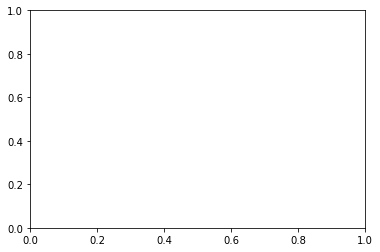

In [11]:
import matplotlib.cbook as cbook
fig, ax = plt.subplots(1, 1)
# Plot boxplots from our computed statistics
stats = {}
# Compute the boxplot stats (as in the default matplotlib implementation)
stats['A'] = cbook.boxplot_stats(data, labels='A')[0]
# bp = ax.bxp([q1,q2,q3], positions=range(3))

# Colour the lines in the boxplot blue
# for element in bp.keys():
#     plt.setp(bp[element], color='C0')


In [37]:
periods = swh_all.get_periods(dt.datetime(2014,1,1),dt.datetime(2014,3,31))
swh_all.year_mean(periods=periods)

/Users/H/WAVES/geo_data_group/data_year.py:370: RuntimeWarning: Mean of empty slice
  axis = 0)


array([2.49834154, 2.71682256, 2.35720213, 2.45050299, 2.707023  ,
       2.47572299, 2.50324839, 2.44353184, 2.54239744])

In [21]:
periods = np.arange(30,35)
y0=1
yE=7
idx = [swh_all.yrpd[y0:yE+1,mn].compressed() for mn in periods]

In [22]:
pu,yu = np.shape(idx)
# idx
for yy in range(yu):
    temp      = np.empty([pu,self.m,self.n])
    temp_mask = np.sum([mask[i[yy]] for i in idx if i[yy]>=t0 and i[yy]<=tE],
            axis = 0)
    temp = np.nanmean(
            [swh_all.data[i[yy]] for i in idx if i[yy]>=t0 and i[yy]<=tE],
            axis = 0)
    temp[temp_mask==False] = np.nan
    if method=='mean':
        temp_array[yy] = np.nanmean(temp)
    elif method=='median':
        temp_array[yy] = np.nanmedian(temp)


(5, 7)

In [248]:
swh_all.mask = False
swh_all.build_static_mask(np.isfinite(G.mask))

/Users/H/WAVES/geo_data_group/data_year.py:331: RuntimeWarning: Mean of empty slice
  axis = 0)


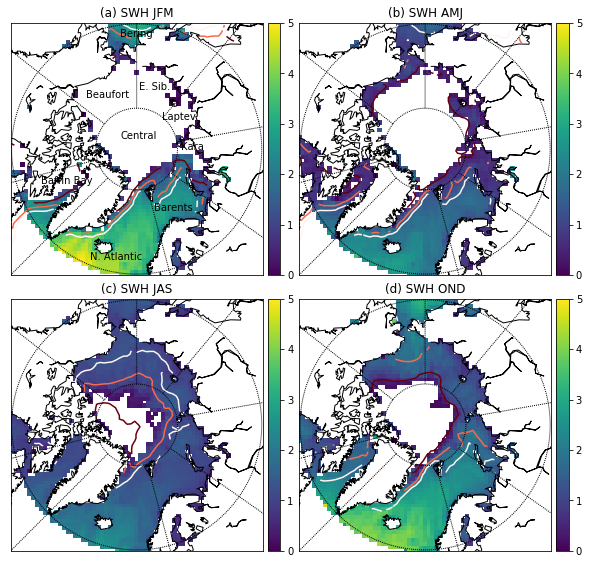

In [552]:
f = plt.figure(figsize=[10,10])
cmap_u = pl.cm.Reds
swh_m = 5
end_p = swh_all.n_t
swh_all.mask = copy.copy(ocean_only_m)
swh_all.build_static_mask(np.isfinite(G.mask))
plt.subplot(2,2,1)
periods = swh_all.get_periods(dt.datetime(2014,1,1),dt.datetime(2014,3,31))
m.pcolormesh(G.xptp,G.yptp,swh_all.clim_map(periods=periods,mask=True,time_set=[0,end_p]).T)
plt.clim([0,swh_m])
m.colorbar(shrink=0.8)
m.contour(G.xptp,G.yptp,ice_binned.clim_map(periods=periods).T,[0.15,0.50,0.85],cmap = cmap_u)
m.drawcoastlines()
m.drawparallels([60,80])
m.drawmeridians([-128,-75,-45,15,55,100,140,180])
plt.title('(a) SWH JFM')
plt.text(G.dxRes*29,G.dyRes*63,'Bering')
plt.text(G.dxRes*20,G.dyRes*47,'Beaufort')
plt.text(G.dxRes*34,G.dyRes*49,'E. Sib.')
plt.text(G.dxRes*40,G.dyRes*41,'Laptev')
plt.text(G.dxRes*29,G.dyRes*36,'Central')
plt.text(G.dxRes*45,G.dyRes*33,'Kara')
plt.text(G.dxRes*38,G.dyRes*17,'Barents')
plt.text(G.dxRes*21,G.dyRes*4 ,'N. Atlantic')
plt.text(G.dxRes*8 ,G.dyRes*24,'Baffin Bay')

plt.subplot(2,2,2)
periods = swh_all.get_periods(dt.datetime(2014,4,1),dt.datetime(2014,6,30))
m.pcolormesh(G.xptp,G.yptp,swh_all.clim_map(periods=periods,mask=True,time_set=[0,end_p]).T)
m.drawcoastlines()
plt.clim([0,swh_m])
m.colorbar(shrink=0.8)
m.contour(G.xptp,G.yptp,ice_binned.clim_map(periods=periods).T,[0.15,0.50,0.85],cmap = cmap_u)
m.drawparallels([60,80])
m.drawmeridians([-128,-75,-45,15,55,100,140,180])
plt.title('(b) SWH AMJ')

plt.subplot(2,2,3)
periods = swh_all.get_periods(dt.datetime(2014,7,1),dt.datetime(2014,9,30))
m.pcolormesh(G.xptp,G.yptp,swh_all.clim_map(periods=periods,mask=True,time_set=[0,end_p]).T)
m.drawcoastlines()
plt.clim([0,swh_m])
m.colorbar(shrink=0.8)
m.contour(G.xptp,G.yptp,ice_binned.clim_map(periods=periods).T,[0.15,0.50,0.85],cmap = cmap_u)
m.drawparallels([60,80])
m.drawmeridians([-128,-75,-45,15,55,100,140,180])
plt.title('(c) SWH JAS')

plt.subplot(2,2,4)
periods = swh_all.get_periods(dt.datetime(2014,10,1),dt.datetime(2014,12,30))
m.pcolormesh(G.xptp,G.yptp,swh_all.clim_map(periods=periods,mask=True,time_set=[0,end_p]).T)
m.drawcoastlines()
plt.clim([0,swh_m])
m.colorbar(shrink=0.8)
m.contour(G.xptp,G.yptp,ice_binned.clim_map(periods=periods).T,[0.15,0.50,0.85],cmap = cmap_u)
m.drawparallels([60,80])
m.drawmeridians([-128,-75,-45,15,55,100,140,180])
plt.title('(d) SWH OND')
plt.subplots_adjust(wspace=0.07,hspace=0.03)
plt.show()
f.savefig('Clim_maps_quarters.pdf',bbox_inches='tight')

/Users/H/anaconda/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1354: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)


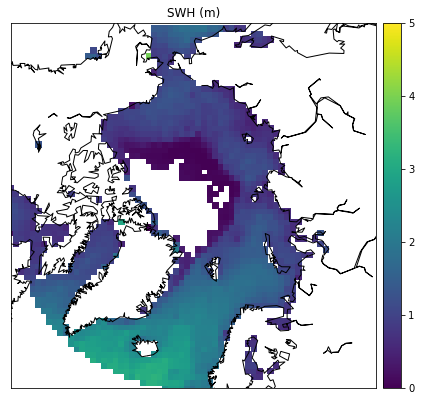

In [553]:
f=plt.figure(figsize=[7,7])
date_u = dt.datetime(2018,3,22)
inds = swh_all.get_index(date_u)
periods = swh_all.get_periods(dt.datetime(2014,1,1),dt.datetime(2014,3,31))
swh_all.mask = copy.copy(ocean_only_m)
swh_all.build_static_mask(np.isfinite(G.mask))
# m.pcolormesh(G.xpts,G.ypts,swh_all[inds,:,:].T)
# m.pcolormesh(G.xpts,G.ypts,swh_all.centile_map(50,mask=True).T)
m.pcolormesh(xptp,yptp,swh_all.centile_map(50,mask=True).T)
m.colorbar(shrink=0.8)
# inds = ice_binned.get_index(date_u)
# m.contour(G.xpts,G.ypts,ice_binned[inds,:,:].T,[0.15,0.50,0.85],cmap = pl.cm.Greens_r)
# plt.clim([0,100])
plt.clim([0,5])
m.drawcoastlines()
plt.title('SWH (m)')
plt.show()
# f.savefig(date_u.strftime('%Y%m%d')+'_CS2_SWH.pdf',bbox_inches = 'tight')

/Users/H/anaconda/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1354: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)


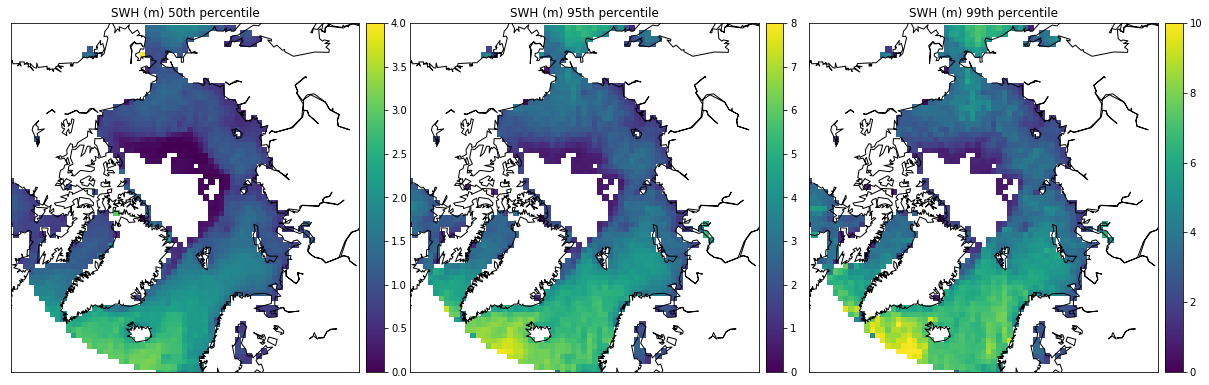

In [564]:
f=plt.figure(figsize=[21,7])
date_u = dt.datetime(2018,3,22)
inds = swh_all.get_index(date_u)
swh_all.mask = False
swh_all.mask = copy.copy(ocean_only_m)
swh_all.build_static_mask(np.isfinite(G.mask))
periods = swh_all.get_periods(dt.datetime(2014,1,1),dt.datetime(2014,12,30))
plt.subplot(1,3,1)
plt.title('SWH (m) 50th percentile')
m.pcolor(G.xptp,G.yptp,swh_all.centile_map(50,periods=periods,mask=True).T)
plt.clim([0,4])
m.drawcoastlines()
m.colorbar(shrink=0.8)
plt.subplot(1,3,2)
plt.title('SWH (m) 95th percentile')
m.pcolor(G.xptp,G.yptp,swh_all.centile_map(95,periods=periods,mask=True).T)
plt.clim([0,8])
m.drawcoastlines()
m.colorbar(shrink=0.8)
plt.subplot(1,3,3)
plt.title('SWH (m) 99th percentile')
m.pcolormesh(G.xptp,G.yptp,swh_all.centile_map(99,periods=periods,mask=True).T)
m.colorbar(shrink=0.8)
# inds = ice_binned.get_index(date_u)
# m.contour(G.xptp,G.yptp,ice_binned[inds,:,:].T,[0.15,0.50,0.85],cmap = pl.cm.Greens_r)
# plt.clim([0,100])
plt.clim([0,10])
m.drawcoastlines()
plt.subplots_adjust(wspace=0.07,hspace=0.03)
# plt.title('SWH (m)')
plt.show()
f.savefig('SWH_all_percentiles.pdf',bbox_inches = 'tight')

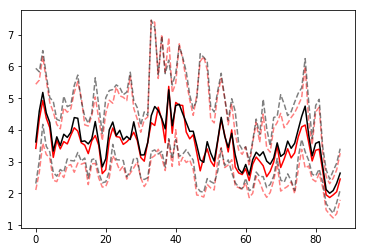

In [31]:
# f=plt.figure(figsize=[6,4])
ax1 = plt.plot(np.nanpercentile(swh_all_prh.data[0:-2]*ocean_only,[25,50,75],axis=(1,2)).T)
for i in [0,2]:
    ax1[i].set_linestyle('dashed')
    ax1[i].set_color('r')
    ax1[i].set_alpha(0.5)
i = 1
ax1[i].set_color('r')
ax1[i].set_alpha(1)
# plt.plot(np.sum(swh_SAR_binc_prh.data>2,axis=(1,2)))
# plt.show()
ax2 = plt.plot(np.nanpercentile(swh_all.data[ind_0:ind_1,:,:]*ocean_only,[25,50,75],axis=(1,2)).T,alpha=0.5)
for i in [0,2]:
    ax2[i].set_linestyle('dashed')
    ax2[i].set_color('k')
    ax2[i].set_alpha(0.5)
i = 1
ax2[i].set_color('k')
ax2[i].set_alpha(1)
# plt.plot(np.sum(swh_SAR_binc_prh.data>2,axis=(1,2)))
plt.show()
f.savefig('swh_time_prh_comp.pdf',bbox_inches='tight')

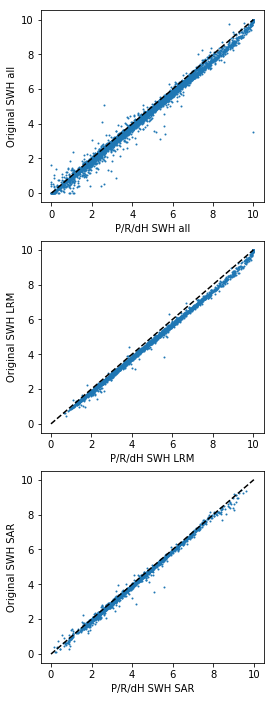

In [33]:
f=plt.figure(figsize=[4,12])
y = swh_all_prh.data[0:-2]*ocean_only
x = swh_all.data[ind_0:ind_1,:,:]*ocean_only
plt.subplot(3,1,1)
plt.xlabel('P/R/dH SWH all')
plt.ylabel('Original SWH all')
plt.plot([0,10],[0,10],'--k')
plt.scatter(x.ravel(),y.ravel(),s=1)

plt.subplot(3,1,2)
plt.xlabel('P/R/dH SWH LRM')
plt.ylabel('Original SWH LRM')
plt.plot([0,10],[0,10],'--k')
plt.scatter(x[swh_LRM_binc_prh.data[0:-2]>3].ravel(),y[swh_LRM_binc_prh.data[0:-2]>3].ravel(),s=1)

plt.subplot(3,1,3)
plt.xlabel('P/R/dH SWH SAR')
plt.ylabel('Original SWH SAR')
plt.plot([0,10],[0,10],'--k')
plt.scatter(x[swh_SAR_binc_prh.data[0:-2]>3].ravel(),y[swh_SAR_binc_prh.data[0:-2]>3].ravel(),s=1)
plt.show()
f.savefig('Orig_vs_prh_scatters.pdf',bbox_inches='tight')

Data year mask not set: ignoring it


/Users/H/WAVES/geo_data_group/data_year.py:320: RuntimeWarning: Mean of empty slice
  axis = 0)


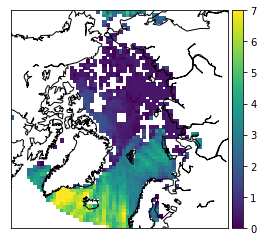

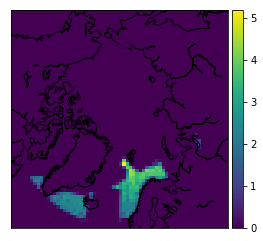

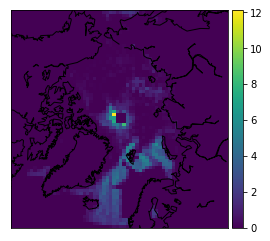

In [203]:
periods = swh_all_prh.get_periods(dt.datetime(2014,2,1),dt.datetime(2014,2,28))
m.pcolormesh(G.xpts,G.ypts,swh_all_prh.clim_map(periods=periods,mask=True).T)
m.drawcoastlines()
m.colorbar(shrink=0.8)
plt.clim([0,7])
plt.show()
m.pcolormesh(G.xpts,G.ypts,swh_LRM_binc_prh.clim_map(periods=periods).T)
m.drawcoastlines()
m.colorbar(shrink=0.8)
# plt.clim([0,7])
plt.show()
m.pcolormesh(G.xpts,G.ypts,swh_SAR_binc_prh.clim_map(periods=periods).T)
m.drawcoastlines()
m.colorbar(shrink=0.8)
# plt.clim([0,7])
plt.show()
# periods = swh_all.get_periods(dt.datetime(2014,7,1),dt.datetime(2014,9,30))
# m.pcolormesh(G.xpts,G.ypts,swh_all.clim_map(periods=periods,mask=True,time_set=[0,end_p]).T)
# m.drawcoastlines()
# m.colorbar(shrink=0.8)
# plt.clim([0,7])
# plt.show()

/Users/H/WAVES/geo_data_group/data_year.py:320: RuntimeWarning: Mean of empty slice
  axis = 0)


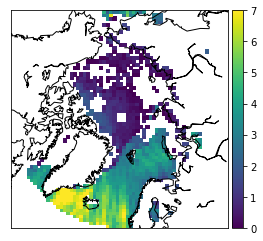

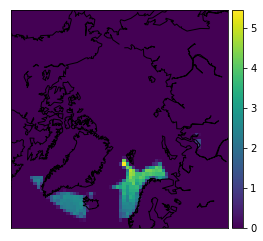

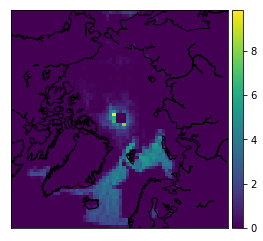

In [161]:
periods = swh_all.get_periods(dt.datetime(2014,2,1),dt.datetime(2014,2,28))
ys = [3,3]
m.pcolormesh(G.xpts,G.ypts,swh_all.clim_map(periods=periods,year_set=ys).T)
m.drawcoastlines()
m.colorbar(shrink=0.8)
plt.clim([0,7])
plt.show()
m.pcolormesh(G.xpts,G.ypts,swh_LRM_binc.clim_map(periods=periods,year_set=ys).T)
m.drawcoastlines()
m.colorbar(shrink=0.8)
# plt.clim([0,7])
plt.show()
m.pcolormesh(G.xpts,G.ypts,swh_SAR_binc.clim_map(periods=periods,year_set=ys).T)
m.drawcoastlines()
m.colorbar(shrink=0.8)
# plt.clim([0,7])
plt.show()
# periods = swh_all.get_periods(dt.datetime(2014,7,1),dt.datetime(2014,9,30))
# m.pcolormesh(G.xpts,G.ypts,swh_all.clim_map(periods=periods,mask=True,time_set=[0,end_p]).T)
# m.drawcoastlines()
# m.colorbar(shrink=0.8)
# plt.clim([0,7])
# plt.show()

In [ ]:
ax.axes.yaxis_inverted()

/Users/H/anaconda/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/H/anaconda/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


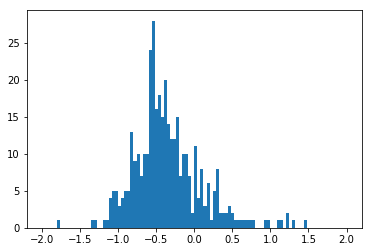

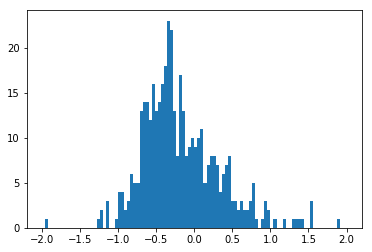

In [205]:
plt.hist(offset_prh[offset_mask_prh].ravel(),bins=100,range=[-2e0,2e0])
plt.show()
plt.hist(offset[ind_0:ind_1][offset_mask[ind_0:ind_1]].ravel(),bins=100,range=[-2e0,2e0])
plt.show()

In [28]:
def plot_swh(tp,swh,gs,dstep):
    fig = plt.figure(figsize=[10,10])
    gs.mplot.pcolormesh(gs.xpts,gs.ypts,swh[tp].T)
    gs.mplot.colorbar()
    gs.mplot.drawcoastlines()
    plt.clim([0,6.0])
    plt.title(this_day.date.strftime('%Y-%m-( %d')+
      'to'+str(this_day.date.day+dstep)+')')
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    plt.close()
    return image

In [18]:
def plot_swh_double(tp,swh_all,swh_fill,aice,gs,dstep):
    fig = plt.figure(figsize=[10,5])
    plt.subplot(1,2,1)
    gs.mplot.pcolormesh(gs.xpts,gs.ypts,swh_all[tp,:,:].T)
    gs.mplot.colorbar()
    gs.mplot.drawcoastlines()
    plt.clim([0,6.0])
    aice.contour(gs.mplot,[0.15,0.5])
    plt.title(this_day.date.strftime('%Y-%m-( %d')+
      'to'+str(this_day.date.day+dstep)+')')
    plt.subplot(1,2,2)
    gs.mplot.pcolormesh(gs.xpts,gs.ypts,swh_fill[tp,:,:].T)
    gs.mplot.colorbar()
    gs.mplot.drawcoastlines()
    plt.clim([0,6.0])
    aice.contour(gs.mplot,[0.15,0.5])
    plt.title(this_day.date.strftime('%Y-%m-( %d')+
      'to'+str(this_day.date.day+dstep)+')')
    fig.tight_layout(pad=0)
    fig.canvas.draw()       # draw the canvas, cache the renderer
    fig.set_constrained_layout(True)
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    plt.close()
    return image

In [20]:
aice = ic.NSIDC_IC(this_day.date)
this_day.date = dt.datetime(2012,8,1)
aice.new_ice(this_day.date)
images = []
dstep = 1
for tt in range(tp-1):
# for tt in range(1):
    images.append(
        plot_swh_double(tt,swh_all,swh_fill,aice,this_day,dstep)
#         plot_swh(tt,swh_fill,this_day,dstep)
                    )
    this_day.date += relativedelta(days=dstep)
    aice.new_ice(this_day.date)
imageio.mimsave('First_saves_2014/100km_1d_2012-08_fill.gif', images, fps=1)

In [7]:
swh_all[0,:,:]

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [ ]:
# filter it

# bin it

# attempt a fill
# need a mask: land plus lon/lat lims
# ice mask too perhaps??

# save
# save each time slice or loop and build up a months?

# test days 1,5,10

# test res 50k 100k

# make a sexy gif